In [2]:
pip install requests beautifulsoup4

In [8]:
# 1. 알리익스프레스
import requests
from bs4 import BeautifulSoup

def search_aliexpress_static(keyword, max_items=10):
    url = f"https://ko.aliexpress.com/w/wholesale-{keyword}.html"
    headers = {
        "User-Agent": "Mozilla/5.0"
    }

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("❌ 요청 실패:", response.status_code)
        return []

    soup = BeautifulSoup(response.text, "html.parser")
    product_blocks = soup.select('div.jr_t')

    results = []
    for block in product_blocks:
        try:
            # 제목
            title_tag = block.find("h3", class_="jr_kp")
            title = title_tag.get_text(strip=True) if title_tag else "제목 없음"

            # 링크 & 이미지
            a_tag = block.find_parent("a", class_="search-card-item")
            if a_tag:
                href = a_tag.get("href", "")
                link = "https:" + href if href.startswith("//") else href

                img_tag = a_tag.find("img", class_="mm_be")
                img_url = img_tag.get("src") if img_tag else ""
                if img_url.startswith("//"):
                    img_url = "https:" + img_url
            else:
                link = "(링크 없음)"
                img_url = ""

            # 가격
            price_spans = block.select("div.jr_kr span")
            price_parts = [span.get_text(strip=True) for span in price_spans]
            price_filtered = [p for p in price_parts if p.isdigit() or p == "."]
            price = "$" + price_filtered[0]+","+price_filtered[2]

            results.append({
                "title": title,
                "price": price,
                "image": img_url,
                "link": link
            })

            if len(results) >= max_items:
                break

        except Exception as e:
            print(f"❌ 상품 블록 파싱 오류: {e}")

    return results

# ✅ 실행 테스트
if __name__ == "__main__":
    keyword = "아이폰16 케이스"
    products = search_aliexpress_static(keyword)
    for i, p in enumerate(products, 1):
        print(f"[{i}] 상품명: {p['title']}")
        print(f"   가격: {p['price']}")
        print(f"   이미지: {p['image']}")
        print(f"   링크: {p['link']}\n")


[1] 상품명: iPhone 16 15 14 13 12 11Pro Max Mini SE 2020 2022 XS XR 7 8 Plus DIY 사진 디자인 맞춤형 케이스 IMD 충격 방지 뒷면 커버
   가격: $3,37
   이미지: https://ae-pic-a1.aliexpress-media.com/kf/S845d1b170efe470ba29978193510cf95h.jpg_480x480q75.jpg
   링크: https://ko.aliexpress.com/item/3256808620012699.html?algo_pvid=e0c06e42-bc18-47c9-bbb7-060e9e5d37da&algo_exp_id=e0c06e42-bc18-47c9-bbb7-060e9e5d37da-0&pdp_ext_f=%7B%22order%22%3A%22693%22%2C%22eval%22%3A%221%22%7D&pdp_npi=4%40dis%21USD%217.03%213.37%21%21%2150.33%2124.16%21%4021010c9a17475593690084718e8c09%2112000046741781358%21sea%21US%210%21ABX&curPageLogUid=9ae4tMjjOFeq&utparam-url=scene%3Asearch%7Cquery_from%3A

[2] 상품명: iPhone 11 12 13 14 15 16 Magsafe 무선 충전 커버 용 고급 자기 매트 반투명 갑옷 충격 방지 케이스
   가격: $2,58
   이미지: https://ae-pic-a1.aliexpress-media.com/kf/S6f0638ad548548fb92bb7f3a1d486687g.jpg_480x480q75.jpg
   링크: https://ko.aliexpress.com/item/3256808722668670.html?algo_pvid=e0c06e42-bc18-47c9-bbb7-060e9e5d37da&algo_exp_id=e0c06e42-bc18-47c9-bbb7-060e9e5d

In [29]:
pip install google

🎯 최종 URL: https://www.taobao.com/list/product/airpod2silicone.htm
[1] 상품명: Cute Floral Gold Initial alphabet Letter AirPods Case For Airpod 1/2 Cases Silicone Wireless
    가격: 23.2元 (한화 환산 없음)
    이미지: 
    링크: https://www.taobao.com/list/item/643467272066.htm?spm=a21wu.10013406.taglist-content.1

[2] 상품명: AirPods 1 2 3 Airpod Pro Key Chain Cartoon Wireless Earphone Bluetooth Headset Case Silicone Cover
    가격: 22.84元 (한화 환산 없음)
    이미지: data:image/gif;base64,iVBORw0KGgoAAAANSUhEUgAAAAEAAAABCAYAAAAfFcSJAAAADUlEQVQImWNgYGBgAAAABQABh6FO1AAAAABJRU5ErkJggg==
    링크: https://www.taobao.com/list/item/861934912897.htm?spm=a21wu.10013406.taglist-content.2

[3] 상품명: 3D Funny Food Wireless Earphone Case For Airpods Pro case Silicone Protect Cover For airpod pro1/2/3
    가격: 20.5元 (한화 환산 없음)
    이미지: data:image/gif;base64,iVBORw0KGgoAAAANSUhEUgAAAAEAAAABCAYAAAAfFcSJAAAADUlEQVQImWNgYGBgAAAABQABh6FO1AAAAABJRU5ErkJggg==
    링크: https://www.taobao.com/list/item/726780838285.htm?spm=a21wu.10013406.tag
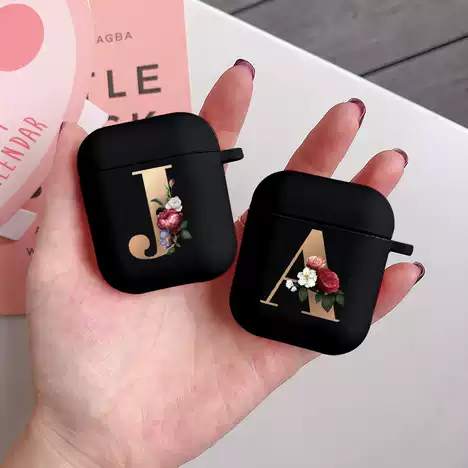

In [38]:
#2. 타오바오
import requests
from bs4 import BeautifulSoup
from googlesearch import search

def get_taobao_category_url(query, max_results=5):
    search_query = f"site:www.taobao.com {query}"
    urls = []
    for url in search(search_query, stop=max_results):
        if "item.taobao.com" not in url and "login.taobao.com" not in url:
            urls.append(url)
            if len(urls) >= max_results:
                break
    return urls[0] if urls else None

def crawl_taobao_category(url, max_items=10):
    headers = {
        "User-Agent": "Mozilla/5.0"
    }
    res = requests.get(url, headers=headers)
    if res.status_code != 200:
        print("❌ 요청 실패:", res.status_code)
        return []

    soup = BeautifulSoup(res.text, "html.parser")
    product_blocks = soup.select("a.item")

    results = []
    for a_tag in product_blocks:
        try:
            # 상세페이지 링크
            link = a_tag.get("href", "")
            if not link.startswith("http"):
                link = "https:" + link

            # 이미지 추출
            img_tag = a_tag.find("img", class_="item-img")
            img_url = ""
            if img_tag and "src" in img_tag.attrs:
                img_url = img_tag["src"]
                if img_url.startswith("data:image"):  # base64 이미지 제외
                    pass # 제외 안하고 실제 웹페이지 만들 때 그대로 사용하기 위함.
                    #img_url = "null"
                elif img_url.startswith("//"):
                    img_url = "https:" + img_url

            # 기타 정보 추출
            block = a_tag
            title = block.select_one("div.item-title")
            price = block.select_one("div.disc-price")
            local_price = block.select_one("div.local-price")

            title_text = title.get_text(strip=True) if title else "제목 없음"
            price_text = price.get_text(strip=True) + "元" if price else "가격 없음"
            local_price_text = local_price.get_text(strip=True) if local_price else "한화 환산 없음"

            results.append({
                "title": title_text,
                "price": price_text,
                "local_price": local_price_text,
                "image": img_url,
                "link": link
            })

            if len(results) >= max_items:
                break

        except Exception as e:
            print(f"❌ 파싱 오류: {e}")

    return results

# ✅ 실행 예시
#if __name__ == "__main__":
keyword = "bluetooth earphone case"
taobao_url = get_taobao_category_url(keyword)
if taobao_url:
    print(f"🎯 최종 URL: {taobao_url}")
    products = crawl_taobao_category(taobao_url)
    for i, p in enumerate(products, 1):
        print(f"[{i}] 상품명: {p['title']}")
        print(f"    가격: {p['price']} ({p['local_price']})")
        print(f"    이미지: {p['image']}")
        print(f"    링크: {p['link']}\n")
else:
    print("❌ 유효한 타오바오 카테고리 URL을 찾지 못했습니다.")
